We are first going to filter our data set using future


In [13]:


import json
import os
import shutil
import pandas as pd
import numpy as np


import glob
from tqdm import tqdm

import unidecode

import subprocess
import  tarfile
from bs4 import BeautifulSoup
import xml.etree.ElementTree as ET
import ast
import zipfile



# Le Figaro


## Processing the data

In [4]:
os.makedirs('./filtered_files_future', exist_ok=True)

# Parcourir tous les fichiers JSON dans le dossier et ses sous-dossiers
for root, dirs, files in os.walk('./le_figaro'):
    for file_name in files:
        if file_name.endswith('.json'):
            
            # Charger le contenu du fichier JSON
            with open(os.path.join(root, file_name), 'r') as json_file:
                json_data = json.load(json_file)
                
                # Vérifier si le terme "future" est présent dans le fichier
                if 'future' in json.dumps(json_data):
                    
                    # Copier le fichier dans le dossier filtré
                    shutil.copyfile(os.path.join(root, file_name), os.path.join('./filtered_files_future', file_name))

In [7]:
if not os.path.exists("../data"):
    os.makedirs("../data")

# Get list of all articles
every_article = glob.glob('./filtered_files_future/*.json')
future_articles = pd.DataFrame(columns=["publication_date", "content"])
dates_fr = set()

for article in tqdm(every_article):
    date = article.split("/")[-1][:10]
    dates_fr.add(date)
    with open(article, 'r') as f:
        data = json.load(f)   
        if "future" in unidecode.unidecode(str.lower(data["contentAsText"][0])):
            future_articles.loc[date] = {"publication_date" : date, "content":data["contentAsText"][0]}
        
# Save data
future_articles.to_csv("../data/future_articles_fr.csv")

# Save dates
with open('../data/dates_fr.txt','w') as f:
    f.write(str(dates_fr))

100%|██████████████████████████████████████| 9695/9695 [01:18<00:00, 123.82it/s]


## Counting words "future" frequency in the corpus

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


df = pd.read_csv("/Users/bina/Documents/BA6/data/future_articles_fr.csv")

df['future_freq'] = df['content'].str.count('future')

# Sum the raw frequency counts to get the total raw frequency count of the term "future" in the corpus
future_freq = df['future_freq'].sum()

# Print the total raw frequency count of the term "future" in the corpus
print(future_freq)


# Sum the raw frequency counts to get the total raw frequency count of the term "future" in the corpus
total_freq = df['future_freq'].sum()

# Create a numpy array of the raw frequency counts and use it as the `x` variable for the polynomial regression function
x = np.array(df['future_freq']).reshape(-1, 1)

# Create another numpy array of the corresponding document indices as the `y` variable for the polynomial regression function
y = np.arange(len(df)).reshape(-1, 1)

# Fit a polynomial regression model to the `x` and `y` variables
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

# Predict the future frequency count for a new document using the polynomial regression model
new_doc_freq = 10  # example future frequency count for a new document
new_doc_index = model.predict(poly.fit_transform([[new_doc_freq]]))



3336


In [28]:
print ( df.columns)

Index(['Unnamed: 0', 'publication_date', 'content'], dtype='object')


In [31]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Load the data from the CSV file
df = pd.read_csv("/Users/bina/Documents/BA6/data/future_articles_fr.csv")

# Extract the date information and create a list of dates
dates = pd.to_datetime(df['publication_date'], format="%Y%m%d.m").dt.date

# Add the list of dates to the DataFrame as a new column
df['publication_date'] = dates

# Calculate the frequency count of the term "future"
df['future_freq'] = df['content'].str.count('future')

# Sum the raw frequency counts to get the total raw frequency count of the term "future" in the corpus
future_freq = df['future_freq'].sum()

# Print the total raw frequency count of the term "future" in the corpus
print(future_freq)

# Create a numpy array of the raw frequency counts and use it as the `x` variable for the polynomial regression function
x = np.array(df['future_freq']).reshape(-1, 1)

# Create another numpy array of the corresponding document indices as the `y` variable for the polynomial regression function
y = np.arange(len(df)).reshape(-1, 1)

# Fit a polynomial regression model to the `x` and `y` variables
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)

# Predict the future frequency count for a new document using the polynomial regression model
new_doc_freq = 10  # example future frequency count for a new document
new_doc_index = model.predict(poly.fit_transform([[new_doc_freq]]))

3336


In [25]:
if 'date' in df.columns:
    print("yes")
    # do something with the date column
else:
    print("date column not found in DataFrame")


date column not found in DataFrame


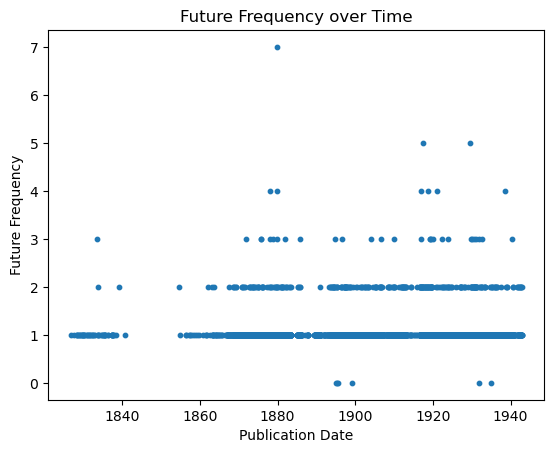

In [34]:
import matplotlib.pyplot as plt

# Create a scatter plot with dates on the x-axis and future_freq on the y-axis
plt.scatter(df['publication_date'], df['future_freq'], s=10)

# Add labels and title
plt.xlabel('Publication Date')
plt.ylabel('Future Frequency')
plt.title('Future Frequency over Time')

# Show the plot
plt.show()


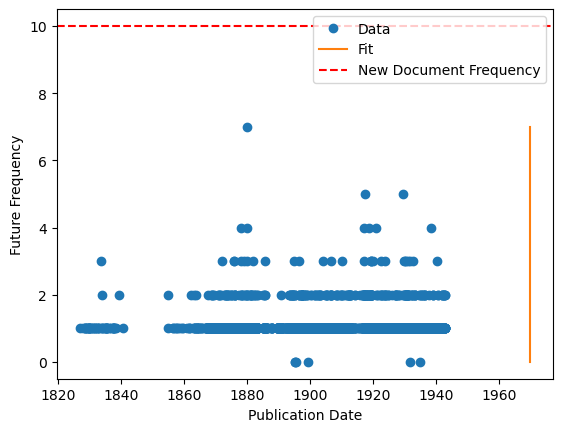

In [35]:
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
x_range_poly = poly.fit_transform(x_range)
y_range = model.predict(x_range_poly)

# Plot the curve with dates on the x-axis
fig, ax = plt.subplots()
ax.plot(dates, x, 'o', label='Data')
ax.plot(pd.to_datetime(y_range, unit='ns'), x_range, label='Fit')
ax.axhline(y=new_doc_freq, color='r', linestyle='--', label='New Document Frequency')
ax.set_xlabel('Publication Date')
ax.set_ylabel('Future Frequency')
ax.legend()
plt.show()

## Counting the frequency of "le future est" in the corpus 

In [ ]:
import nltk
from nltk.text import Text
nltk.download('punkt')

# Load the corpus
corpus_file = "/Users/bina/Documents/BA6/data/future_articles_fr.csv"
with open(corpus_file, 'r', encoding='utf-8') as f:
    corpus = f.read()

# Tokenize the corpus
tokens = nltk.word_tokenize(corpus)

# Create a Text object
text = Text(tokens)

# Define the tri-gram to search for
tri_gram = ["le", "future", "est"]

# Define the time blocks
time_blocks = [(1840, 1860), (1860, 1880), (1880, 1900), (1900, 1920)]

# Loop over the time blocks and extract the top 5 most common word uses of the tri-gram in each block
for start, end in time_blocks:
    print(f"Time block: {start}-{end}")
    filtered_text = [w for w in text if start <= int(w) <= end]
    concordance = text.concordance_list(tri_gram, width=100)
    freq_dist = nltk.FreqDist([c.line.strip() for c in concordance])
    top_5 = freq_dist.most_common(5)
    for use, count in top_5:
        print(f"{use}: {count}")
    print()

[nltk_data] Downloading package punkt to /Users/bina/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
